In [41]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

cols = ['gender', 'indigenous', 'age', 'Education Department', 'Grade', 'Time',
       'type', 'Tuition', 'GPA', 'Study leave', 'Change field',
       'Guest', 'transitional', 'Multiple disciplines', 'nationality',
       'marital status', 'children', 'Province of birth', 'support', 'Job']
df_test = pd.read_excel('DATA.xlsx')
df_test.columns = cols
df_test.drop([0,1],axis =0, inplace = True)
df_test.reset_index(drop=True, inplace=True)
df_test = df_test.astype('float')

df_test.head(10)

,gender,indigenous,age,Education Department,Grade,Time,type,Tuition,GPA,Study leave,Change field,Guest,transitional,Multiple disciplines,nationality,marital status,children,Province of birth,support,Job
0,2.0,2.0,35.0,1.0,3.0,2.0,1.0,0.0,18.11,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0
1,1.0,1.0,37.0,1.0,3.0,1.0,1.0,0.0,18.52,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0
2,2.0,2.0,23.0,2.0,1.0,2.0,1.0,0.0,18.65,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0
3,2.0,2.0,23.0,1.0,1.0,1.0,1.0,0.0,18.02,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0
4,1.0,2.0,29.0,1.0,3.0,3.0,1.0,0.0,19.11,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0
5,2.0,2.0,42.0,1.0,3.0,3.0,1.0,0.0,18.11,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,1.0,1.0
6,2.0,1.0,47.0,1.0,3.0,3.0,2.0,7100000.0,18.98,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,1.0
7,2.0,1.0,32.0,1.0,3.0,3.0,2.0,7100000.0,18.22,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0
8,2.0,1.0,30.0,1.0,2.0,3.0,1.0,0.0,18.13,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,1.0
9,1.0,2.0,26.0,1.0,2.0,3.0,1.0,0.0,16.39,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0


<AxesSubplot:xlabel='Study leave', ylabel='count'>

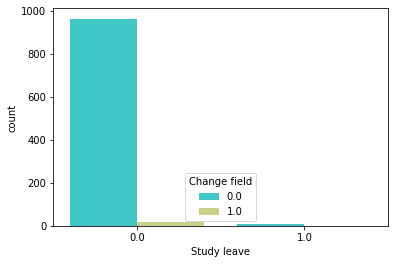

In [42]:
sns.countplot(x='Study leave',hue='Change field',data=df_test,palette='rainbow')

<AxesSubplot:xlabel='Study leave', ylabel='count'>

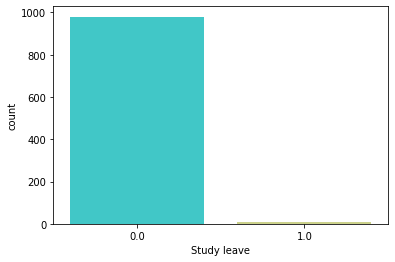

In [43]:
sns.countplot(x='Study leave',data=df_test,palette='rainbow')

<AxesSubplot:xlabel='Change field', ylabel='count'>

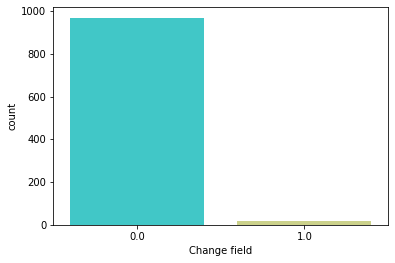

In [44]:
sns.countplot(x='Change field',data=df_test,palette='rainbow')

<AxesSubplot:>

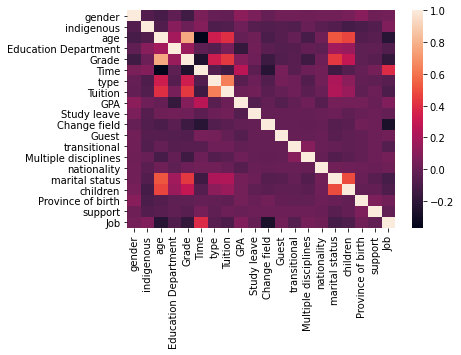

In [45]:
#plt.figure(figsize=(8,5))
#sns.heatmap(df_test.corr()[:5], annot=True)
sns.heatmap(df_test.corr(), annot=False)

In [46]:
df_test = df_test.astype('float')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                987 non-null    float64
 1   indigenous            987 non-null    float64
 2   age                   987 non-null    float64
 3   Education Department  987 non-null    float64
 4   Grade                 987 non-null    float64
 5   Time                  987 non-null    float64
 6   type                  987 non-null    float64
 7   Tuition               987 non-null    float64
 8   GPA                   987 non-null    float64
 9   Study leave           987 non-null    float64
 10  Change field          987 non-null    float64
 11  Guest                 987 non-null    float64
 12  transitional          987 non-null    float64
 13  Multiple disciplines  987 non-null    float64
 14  nationality           987 non-null    float64
 15  marital status        9

In [47]:
def dummy_fill(df):
    SL = df['Study leave']
    CF = df['Change field']
    Gu = df['Guest']
    Tr = df['transitional']
    MD = df['Multiple disciplines']

    if SL == 1:
        return 'SL'
    if CF == 1:
        return 'CF'
    if Gu == 1:
        return 'Gu'
    if Tr == 1:
        return 'Tr'
    if MD == 1:
        return 'MD' 
    else: 
        return '0'       

df_test['newClass'] = df_test.apply(dummy_fill, axis=1)

# increase number of non-zero newClass
chance_list = ['SL', 'CF', 'Gu', 'Tr', 'MD']
for i in range(len(df_test)):
    if 100*len(df_test[(df_test['newClass'] != '0')]) / len(df_test) > 10: break
    if df_test.iloc[i]['newClass'] == '0': df_test.at[i, 'newClass'] = random.choice(chance_list)
    

#df_test.drop('Class', axis=1, inplace=True)
#test = pd.get_dummies(df_test['Sex'])
#test['newSex'] = test.apply(dummy_fill, axis=1)
df_test.head()

print(df_test['newClass'].value_counts())
print("non zero percentage:", 100*len(df_test[(df_test['newClass'] != '0')]) / len(df_test))

0     888
CF     29
MD     19
Gu     17
SL     17
Tr     17
Name: newClass, dtype: int64
non zero percentage: 10.030395136778116


In [48]:
df_test.head()

,gender,indigenous,age,Education Department,Grade,Time,type,Tuition,GPA,Study leave,...,Guest,transitional,Multiple disciplines,nationality,marital status,children,Province of birth,support,Job,newClass
0,2.0,2.0,35.0,1.0,3.0,2.0,1.0,0.0,18.11,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,Tr
1,1.0,1.0,37.0,1.0,3.0,1.0,1.0,0.0,18.52,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,SL
2,2.0,2.0,23.0,2.0,1.0,2.0,1.0,0.0,18.65,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,Gu
3,2.0,2.0,23.0,1.0,1.0,1.0,1.0,0.0,18.02,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,CF
4,1.0,2.0,29.0,1.0,3.0,3.0,1.0,0.0,19.11,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,MD


In [49]:
#df_test.info()
print(df_test['Study leave'].value_counts())
print(df_test['Change field'].value_counts())
print(df_test['Guest'].value_counts())
print(df_test['transitional'].value_counts())
print(df_test['Multiple disciplines'].value_counts())

0.0    980
1.0      7
Name: Study leave, dtype: int64
0.0    969
1.0     18
Name: Change field, dtype: int64
0.0    980
1.0      7
Name: Guest, dtype: int64
0.0    981
1.0      6
Name: transitional, dtype: int64
0.0    971
1.0     16
Name: Multiple disciplines, dtype: int64


In [50]:
#df_test.isnull().sum()
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                987 non-null    float64
 1   indigenous            987 non-null    float64
 2   age                   987 non-null    float64
 3   Education Department  987 non-null    float64
 4   Grade                 987 non-null    float64
 5   Time                  987 non-null    float64
 6   type                  987 non-null    float64
 7   Tuition               987 non-null    float64
 8   GPA                   987 non-null    float64
 9   Study leave           987 non-null    float64
 10  Change field          987 non-null    float64
 11  Guest                 987 non-null    float64
 12  transitional          987 non-null    float64
 13  Multiple disciplines  987 non-null    float64
 14  nationality           987 non-null    float64
 15  marital status        9

,gender,indigenous,age,Education Department,Grade,Time,type,Tuition,GPA,Study leave,...,Guest,transitional,Multiple disciplines,nationality,marital status,children,Province of birth,support,Job,newClass
0,2.0,2.0,35.0,1.0,3.0,2.0,1.0,0.0,18.11,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,Tr
1,1.0,1.0,37.0,1.0,3.0,1.0,1.0,0.0,18.52,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,SL
2,2.0,2.0,23.0,2.0,1.0,2.0,1.0,0.0,18.65,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,Gu
3,2.0,2.0,23.0,1.0,1.0,1.0,1.0,0.0,18.02,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,CF
4,1.0,2.0,29.0,1.0,3.0,3.0,1.0,0.0,19.11,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,MD


In [51]:
X = df_test.drop(['Study leave', 'Change field', 'Guest', 'transitional', 'Multiple disciplines', 'newClass'], axis=1) 
y = df_test['newClass']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

Columns for training: ['gender', 'indigenous', 'age', 'Education Department', 'Grade', 'Time', 'type', 'Tuition', 'GPA', 'nationality', 'marital status', 'children', 'Province of birth', 'support', 'Job']
(789, 15)
(198, 15)
(789,)
(198,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.9292929292929293
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       184
          CF       0.00      0.00      0.00         3
          MD       0.00      0.00      0.00         5
          SL       0.00      0.00      0.00         1
          Tr       0.00      0.00      0.00         5

    accuracy                           0.93       198
   macro avg       0.19      0.20      0.19       198
weigh

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

In [38]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       184
          CF       0.00      0.00      0.00         1
          Gu       0.00      0.00      0.00         0
          MD       0.50      0.17      0.25         6
          SL       0.00      0.00      0.00         3
          Tr       1.00      0.50      0.67         4

    accuracy                           0.87       198
   macro avg       0.41      0.26      0.31       198
weighted avg       0.93      0.87      0.89       198

[[169   9   4   1   1   0]
 [  0   0   1   0   0   0]
 [  0   0   0   0   0   0]
 [  3   1   1   1   0   0]
 [  2   1   0   0   0   0]
 [  2   0   0   0   0   2]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       184
          CF       0.00      0.00      0.00         1
          Gu       0.00      0.00      0.00         0
          MD       0.00      0.00      0.00         6
          SL       0.00      0.00      0.00         3
          Tr       0.00      0.00      0.00         4

    accuracy                           0.92       198
   macro avg       0.16      0.16      0.16       198
weighted avg       0.88      0.92      0.90       198

[[182   0   0   2   0   0]
 [  1   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  5   0   1   0   0   0]
 [  3   0   0   0   0   0]
 [  2   1   1   0   0   0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=4,activation='relu'))   # hidden layers
#model.add(Dense(4,activation='relu'))
#model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(units=6,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20, verbose=False)

ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


In [35]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#read the dataset
#note that the csv file is space delimited
#abalone_df = pd.read_csv('abalone.csv',  delimiter=' ') 
abalone_df = pd.read_csv('abalone.csv') 

class_list = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6']
class_li = []
for i in range(abalone_df.shape[0]):
    class_li.append(random.choice(class_list))


abalone_df['Class'] = pd.Series(class_li)
abalone_df.head()
#abalone_df.columns

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,A3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,A3
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,A5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,A5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,A6


In [37]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Class           4177 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 326.5+ KB


In [38]:
#pd.get_dummies(abalone_df['Sex'])
#abalone_df.shape

print(abalone_df['Sex'].value_counts())
print(abalone_df['Class'].value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64
A6    721
A3    708
A5    696
A1    689
A4    687
A2    676
Name: Class, dtype: int64


In [39]:
def sex_dummy(df):
    M = df['M']
    F = df['F']
    I = df['I']


    if M == 1:
        return 'M'
    if F == 1:
        return 'F'
    if I == 1:
        return 'I'              

def class_dummy(df):
    CLASS = df['Class']
    if CLASS == 'A1':
        return 1
    elif CLASS == 'A2':
        return 2
    elif CLASS == 'A3':
        return 3
    elif CLASS == 'A4':
        return 4
    elif CLASS == 'A5':
        return 5
    elif CLASS == 'A6':
        return 6    

abalone_df['newClass'] = abalone_df.apply(class_dummy, axis=1)
abalone_df.drop('Class', axis=1, inplace=True)

test = pd.get_dummies(abalone_df['Sex'])
test['newSex'] = test.apply(sex_dummy, axis=1)
test.head()


,F,I,M,newSex
0,0,0,1,M
1,0,0,1,M
2,1,0,0,F
3,0,0,1,M
4,0,1,0,I


In [40]:
abalone_df['Sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [41]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,newClass
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,3
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,6


In [42]:
#Create training and test datasets
#CLASS was recoded into SIZE_CLASS to change from string to integer
#CLASS needs to be dropped
X = abalone_df.drop(['Sex', 'newClass'], axis=1) 
y = abalone_df['Sex']

print(list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)



#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=['Female','Infant', 'Male'],
columns=['predicted_Female', 'predicted_Infant', 'predicted_Male'])

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
(3341, 8)
(836, 8)
(3341,)
(836,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Intercept: 
 [-1.78722045  1.04125356  0.74596689]
Coefficients: 
 [[-6.14592603  6.60729386  3.92921544  1.87257388 -2.66890494  5.98939453
  -1.50630821  0.06142573]
 [12.1794255  -6.83041835 -5.45065883 -4.22198733  2.79759101 -8.4932565
   3.09534938 -0.12236148]
 [-6.03349947  0.22312449  1.52144339  2.34941345 -0.12868607  2.50386196
  -1.58904117  0.06093575]]
Accuracy Score: 0.5490430622009569
              precision    recall  f1-score   support

           F       0.48      0.33      0.39       270
           I       0.66      0.81      0.72       260
 

In [46]:
y_train.head()

1130    M
1274    I
3224    M
4170    M
3251    I
Name: Sex, dtype: object